<a href="https://colab.research.google.com/github/ikabrain/MiniProject09/blob/main/abalone_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# [Abalone Dataset](https://archive.ics.uci.edu/dataset/1/abalone) - EDA and Feature Extraction by Ikansh Mahajan

---
*Click [here](https://archive.ics.uci.edu/static/public/1/abalone.zip) to download.*

Abalones are marine snails with a flattened spiral shell protecting a muscular foot which is a highly prized dish on seafood menus. Younger abalone generally have a milder, sweeter, and more tender flavor, while older abalone can be tougher and have a more pronounced, sometimes slightly bitter, taste.

Current method for determining the age of abalone involves the time-consuming process of cutting the shell through the cone, staining it, and counting the number of rings through a microscope. However, other easier-to-obtain measurements listed in the given dataset can be used to predict the age.

| Variable Name  |  Data Type  | Unit  |  Description                  |
| -------------  | ----------- | ----- | ----------------------------- |
| Sex            | Categorical | --    | M, F, and I(infant)           |
| Length         | Continuous  | mm    | Longest shell                 |
| Diameter	     | Continuous  | mm    | ⊥ to length                   |
| Height         | Continuous  | mm    | Includes meat                 |
| Whole weight   | Continuous  | grams | Whole abalone                 |
| Shucked weight | Continuous  | grams | Weight of meat                |
| Viscera weight | Continuous  | grams | Gut after bleeding            |
| Shell weight   | Continuous  | grams | After being dried             |
| Rings          | Integer     | --    | +1.5 gives the age in years   |

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading dataset
df = pd.read_csv("abalone.data")
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
df.shape

(4177, 9)

In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [5]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


---
## Data Cleaning

### Removing Nulls and Duplicates (None found.)

In [7]:
df.isnull().sum() # no null value

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


In [8]:
df.duplicated().sum() # no duplicated records

np.int64(0)

### Checking for illegal sizes/weights (2 found for height)

In [14]:
(df.iloc[:, 1:] <= 0).any()

,0
Length,False
Diameter,False
Height,True
Whole_weight,False
Shucked_weight,False
Viscera_weight,False
Shell_weight,False
Rings,False


In [17]:
df[df['Height'] <= 0]

Index([1257, 3996], dtype='int64')

In [18]:
df.drop(index=df[df['Height'] <= 0].index, inplace=True)

### Converting Rings to Age (+1.5)

In [19]:
df['Rings'] += 1.5
df.rename(columns={'Rings': 'Age'}, inplace=True)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole_weight    4175 non-null   float64
 5   Shucked_weight  4175 non-null   float64
 6   Viscera_weight  4175 non-null   float64
 7   Shell_weight    4175 non-null   float64
 8   Age             4175 non-null   float64
dtypes: float64(8), object(1)
memory usage: 326.2+ KB


In [21]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,11.435090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,9.500000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,12.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


### Fixing Infants in Sex using CLASSIFICATION

In [22]:
df['Sex'].value_counts()

,count
Sex,
M,1528
I,1340
F,1307


<Axes: xlabel='Sex', ylabel='Age'>

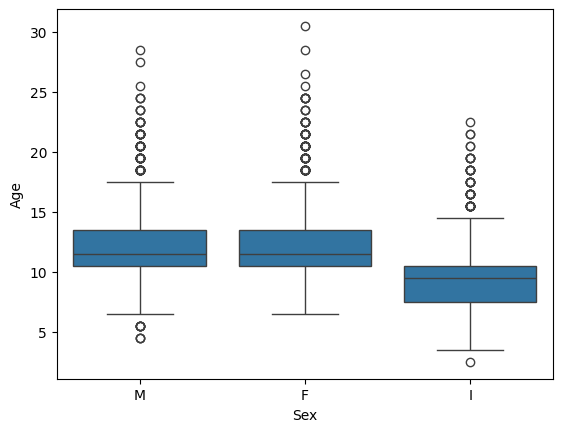

In [23]:
sns.boxplot(data=df, x='Sex', y='Age')

In [24]:
df[['Sex', 'Age']].groupby(df['Sex']).max()

,Sex,Age
Sex,,
F,F,30.5
I,I,22.5
M,M,28.5


Infants with unidentified gender in the dataset are as old as 22.5 years - which doesn't make any sense biologically!

Also, we can't just drop / modify them - they account for a good chunk for our data!

In [25]:
df[df['Sex'] == 'I']['Age'].mean() # biologically incorrect!

np.float64(9.39179104477612)

Comparing the supposedly 'infant' abalones against weights of adults,

In [26]:
df_correct = df[df['Sex'] != 'I'].copy().reset_index(drop=True)
df_correct.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5


In [27]:
df_infant = df[df['Sex'] == 'I'].copy().reset_index(drop=True)
df_infant.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
1,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
2,I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,8.5
3,I,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,11.5
4,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,6.5


<Axes: xlabel='Age', ylabel='Whole_weight'>

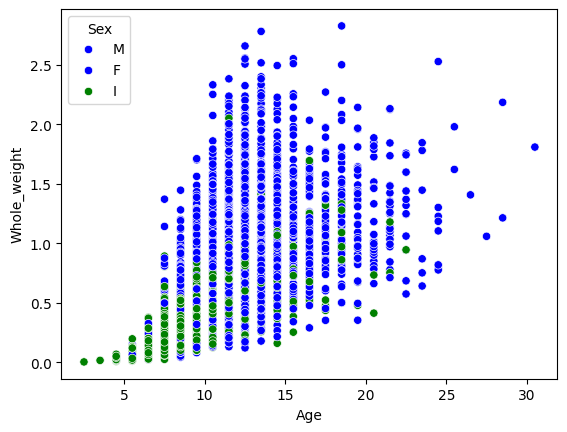

In [28]:
sns.scatterplot(x='Age', y='Whole_weight', data=df, hue='Sex', palette=['blue', 'blue', 'green'])

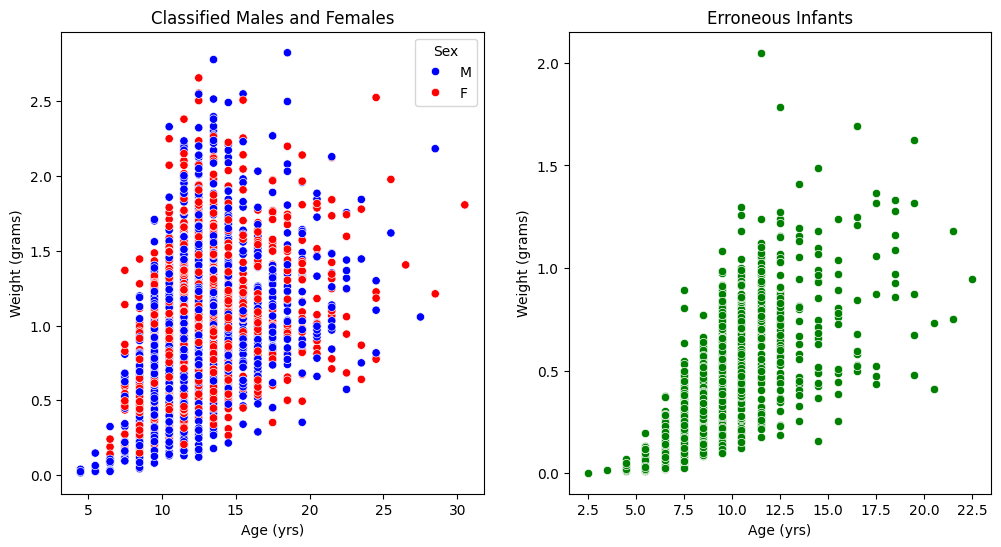

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Classified Males and Females")
sns.scatterplot(x='Age', y='Whole_weight', data=df_correct, hue='Sex', palette=['blue', 'red'])
plt.xlabel("Age (yrs)")
plt.ylabel("Weight (grams)")

plt.subplot(1, 2, 2)
plt.title("Erroneous Infants")
sns.scatterplot(x='Age', y='Whole_weight', data=df_infant, color='green')
plt.xlabel("Age (yrs)")
plt.ylabel("Weight (grams)")

plt.show()

**Conclusion:** Some infants must be misclassified adult males and females!

For reclassification, we'll apply a simple model on already present 'Males' and 'Females', and then apply that to the sex of 'Infants'

In [35]:
from sklearn.ensemble import RandomForestClassifier

X = df_correct.drop(columns='Sex')
y = df_correct['Sex']

rfc = RandomForestClassifier()
sex_model = rfc.fit(X, y)

predicted_sex = sex_model.predict(df_infant[X.columns])
df_infant_correct = df_infant.copy()
df_infant_correct['Sex'] = predicted_sex

df_infant_correct.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
1,M,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
2,M,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,8.5
3,M,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,11.5
4,M,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,6.5


Confirming validity in distribution of data,

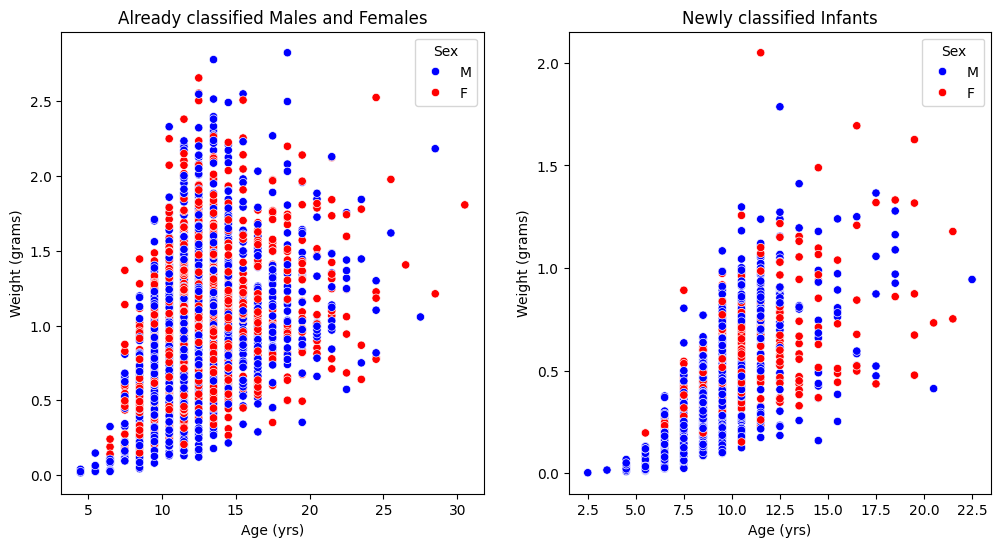

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Already classified Males and Females")
sns.scatterplot(x='Age', y='Whole_weight', data=df_correct, hue='Sex', palette=['blue', 'red'])
plt.xlabel("Age (yrs)")
plt.ylabel("Weight (grams)")

plt.subplot(1, 2, 2)
plt.title("Newly classified Infants")
sns.scatterplot(x='Age', y='Whole_weight', data=df_infant_correct, hue='Sex', palette=['blue', 'red'])
plt.xlabel("Age (yrs)")
plt.ylabel("Weight (grams)")

plt.show()

Thus, the infant data has distribution very similar to that of the original data and can now be used in our data!

In [37]:
final_df = pd.concat([df_correct, df_infant_correct])
final_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5


---
## Full EDA

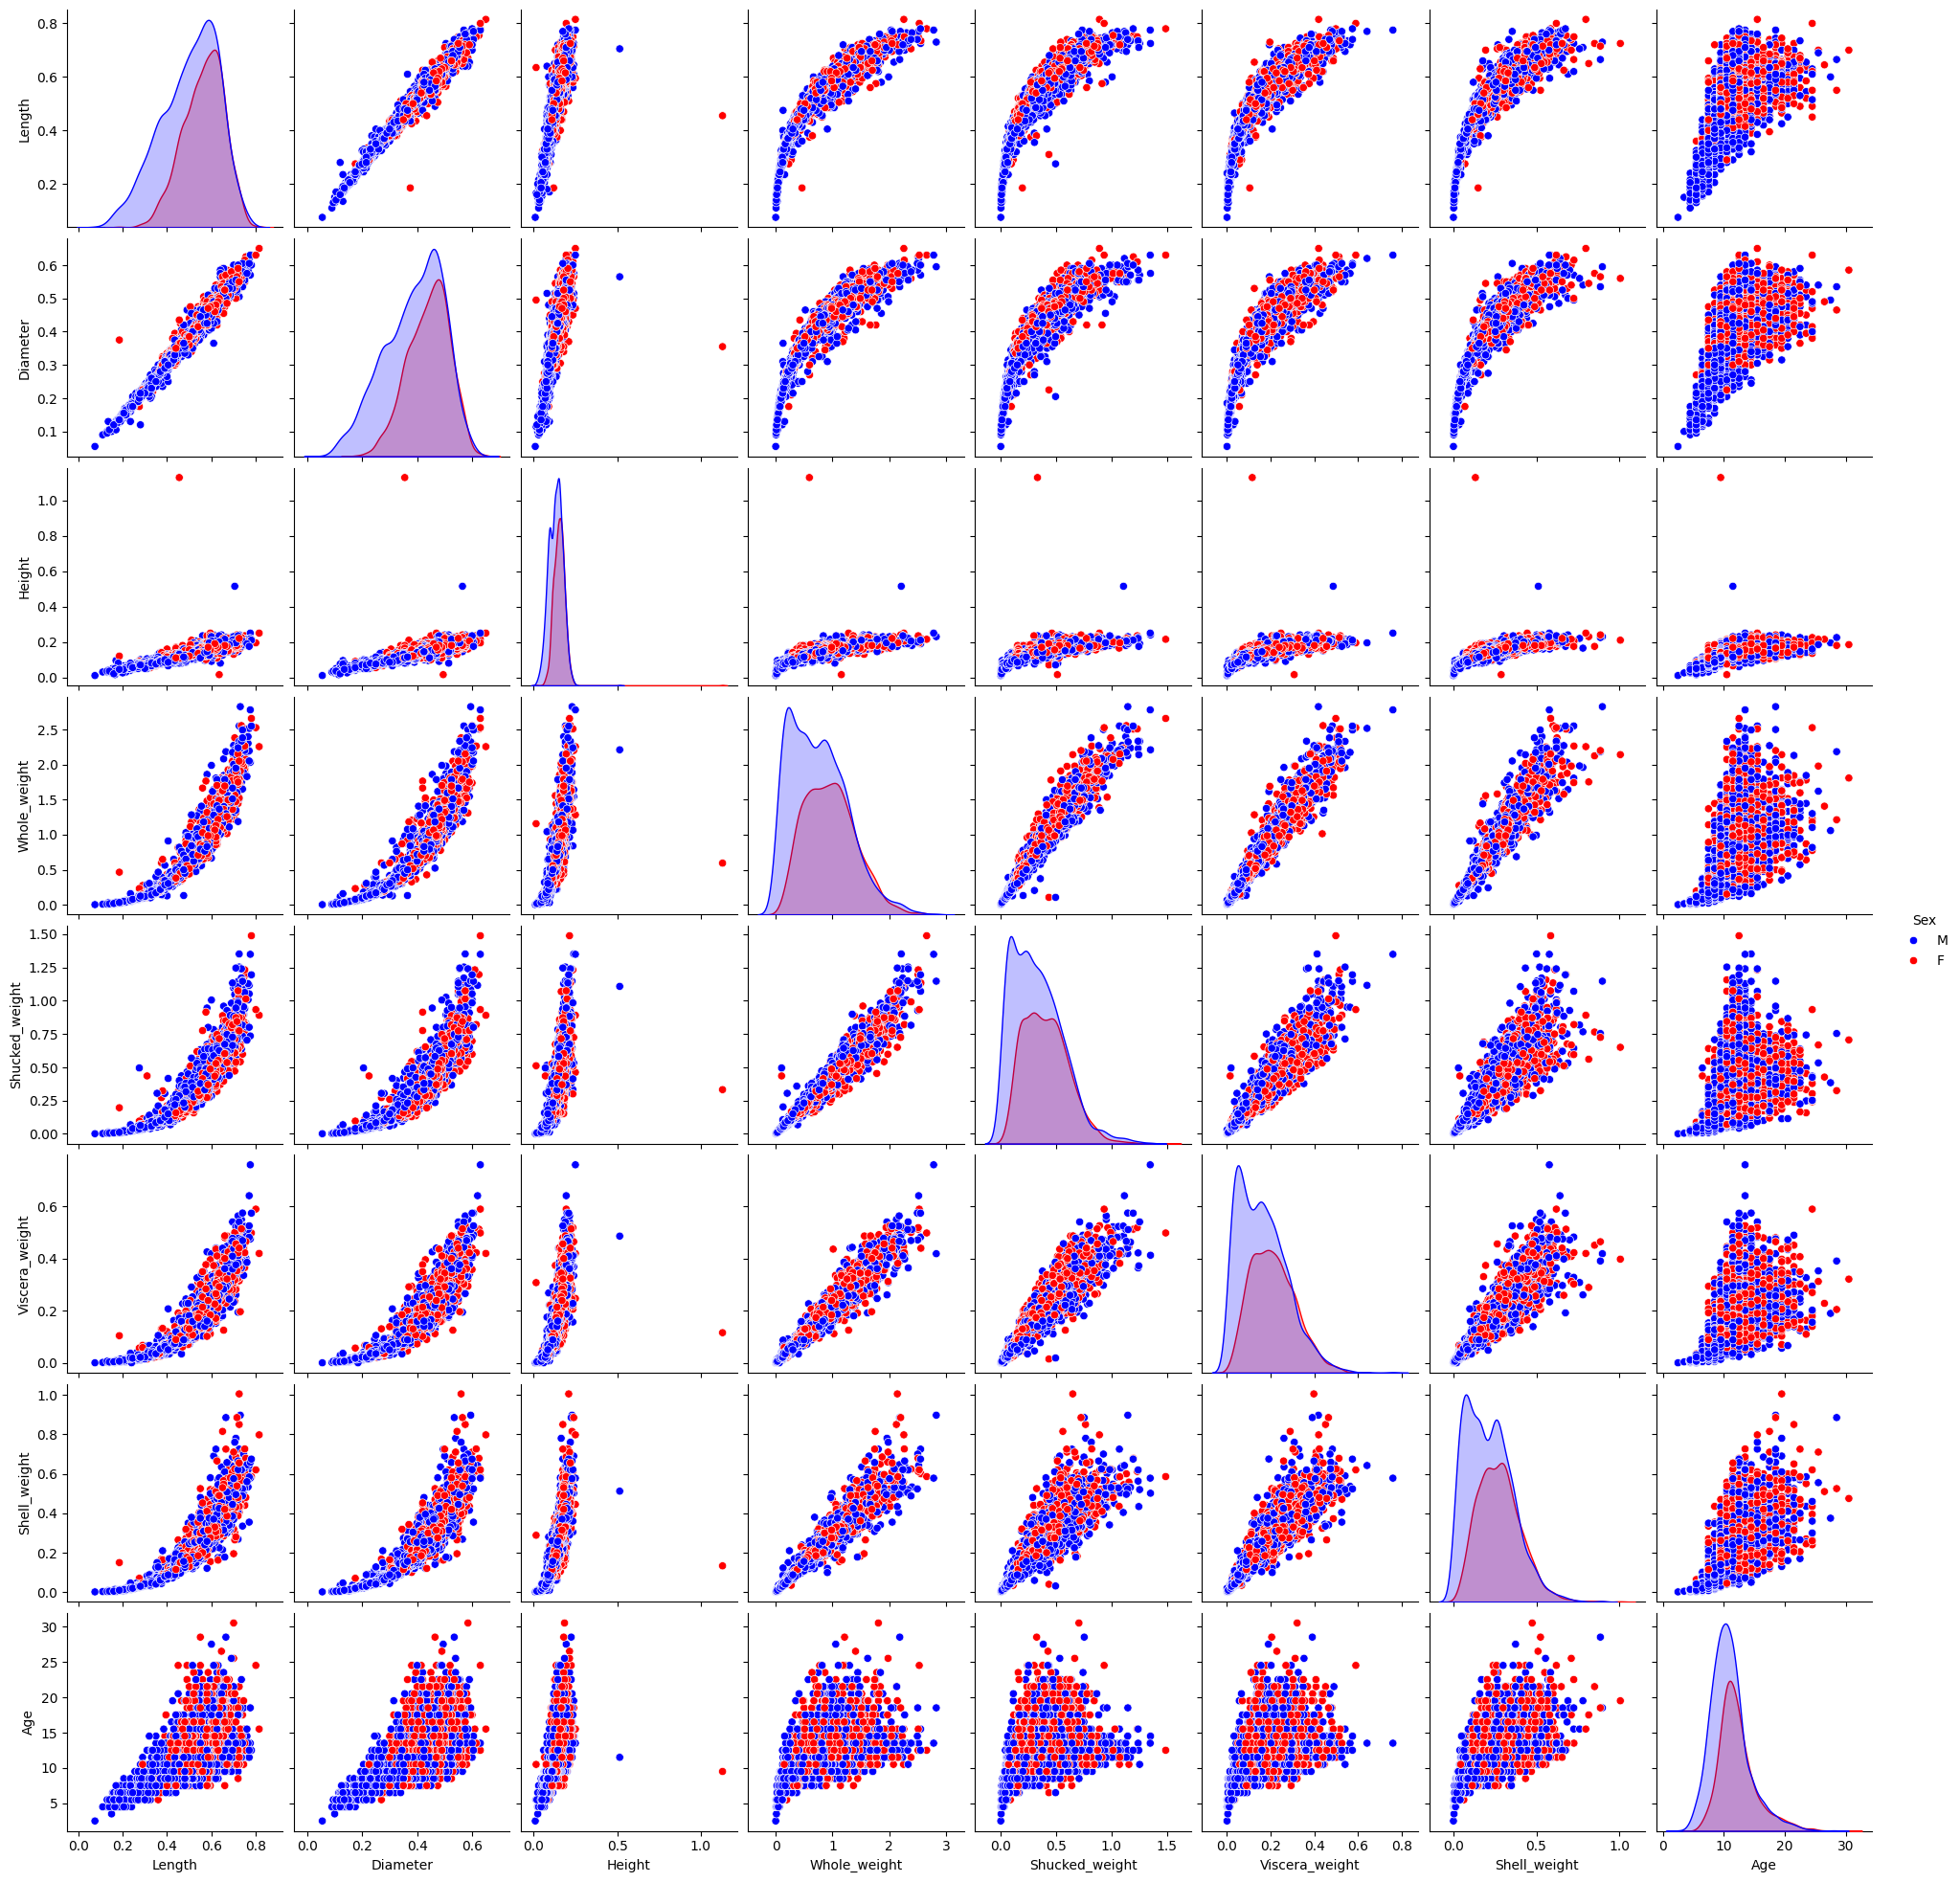

In [38]:
sns.pairplot(data=final_df, hue='Sex', palette=['blue', 'red'])

### Sex vs Age of Snails

<Axes: xlabel='Sex', ylabel='Age'>

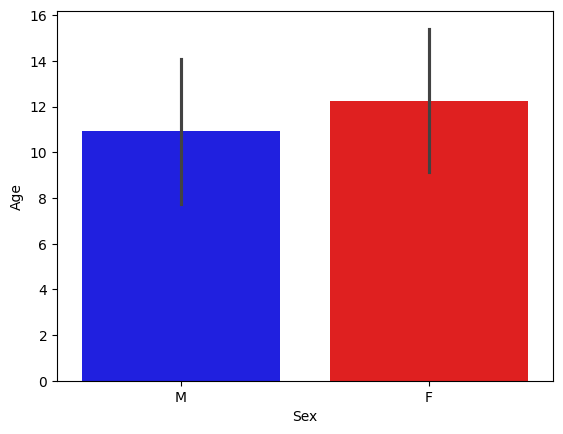

In [39]:
sns.barplot(data=final_df, x='Sex', y='Age', hue='Sex', palette=["Blue", "Red"], errorbar='sd') # Errorbar shows standard deviation

**TENTATIVE CONCLUSION:** On an average, female abalone snails might be living longer than males.




### Size vs Age
How does the snail's size vary with its age?

In [40]:
size_attr = ['Length', 'Diameter', 'Height']

In [41]:
# To make all graphs have same scale for better comparision of values
min_size = min([final_df[x].min() for x in size_attr])
max_size = max([final_df[x].max() for x in size_attr])

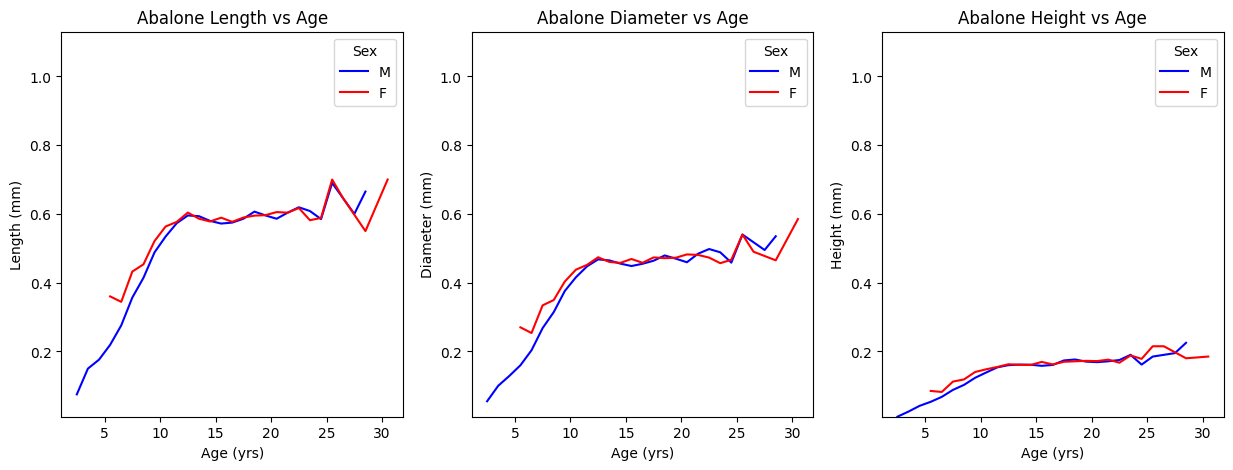

In [42]:
plt.figure(figsize=(5*len(size_attr), 5))

for i, attr in enumerate(size_attr):
    plt.subplot(1,3,i+1)
    plt.title(f"Abalone {attr} vs Age")
    sns.lineplot(data=final_df, x='Age', y=attr, hue='Sex', palette=['Blue', 'Red'], errorbar=None)
    plt.xlabel("Age (yrs)")
    plt.ylabel(f"{attr} (mm)")
    plt.ylim(min_size, max_size)

plt.show()

In [45]:
final_df[final_df['Length'] == final_df['Length'].max()]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1004,F,0.815,0.65,0.25,2.255,0.8905,0.42,0.7975,15.5


In [46]:
final_df[final_df['Diameter'] == final_df['Diameter'].max()]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1004,F,0.815,0.65,0.25,2.255,0.8905,0.42,0.7975,15.5


In [47]:
final_df[final_df['Height'] == final_df['Height'].max()]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1371,F,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,9.5


In [48]:
final_df[size_attr].groupby(final_df['Sex']).mean()

,Length,Diameter,Height
Sex,,,
F,0.562119,0.440077,0.152342
M,0.500033,0.387646,0.131526


**CONCLUSIONS:-**
1. Length and diameter of these snails is greater than their heights.
2. Younger snails are smaller, older snails are bigger.
3. Before 10 years, all abalone increase rapidly in size (esp their length and diameter), but after maturing to an age > 15 years, their rate of growth suddenly decreases.
4. Even though the rate of growth is slowing down, the largest snail in length and diameter is the same 15.5 years old female.
5. Highest snail is aged 9.5 years.
6. Females are on an avg slightly bigger than males

### Weight vs Age
Is there any clear relationship between the weights and the age of the snail?

In [51]:
wt_attr = ['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

In [52]:
# To make all graphs have same scale for better comparision of values
min_size = min([final_df[x].min() for x in wt_attr])
max_size = max([final_df[x].max() for x in wt_attr])

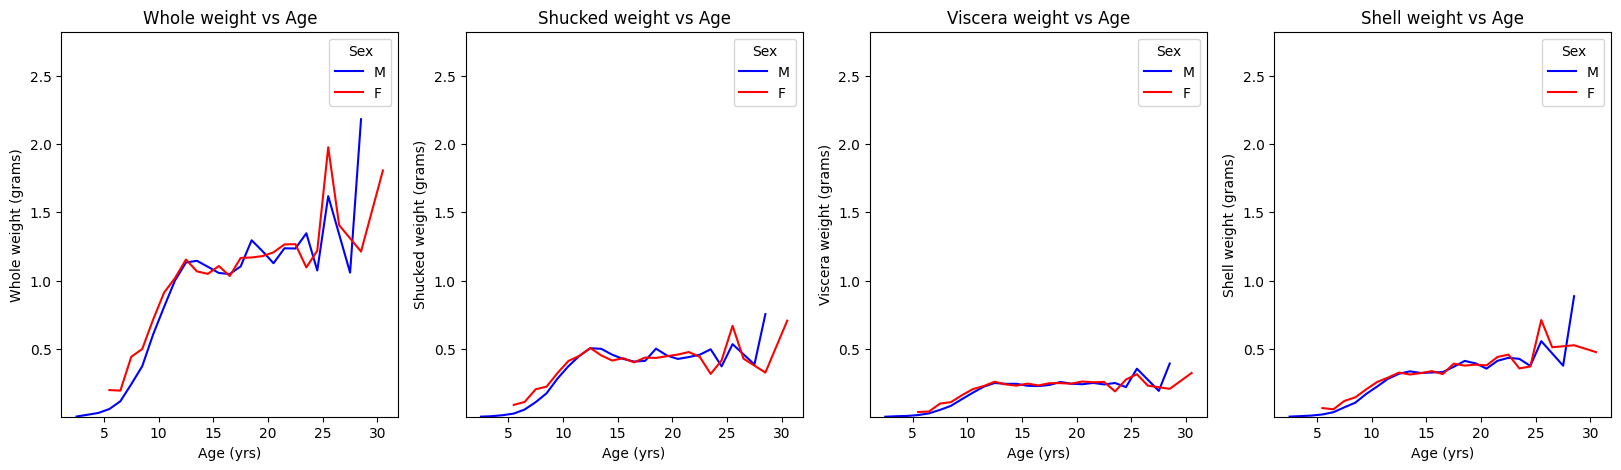

In [62]:
plt.figure(figsize=(5*len(wt_attr), 5))

for i, attr in enumerate(wt_attr):
    plt.subplot(1,4,i+1)
    plt.title(f"{attr.replace('_', ' ')} vs Age")
    sns.lineplot(data=final_df, x='Age', y=attr, hue='Sex', palette=['Blue', 'Red'], errorbar=None)
    plt.xlabel("Age (yrs)")
    plt.ylabel(f"{attr.replace('_', ' ')} (grams)")
    plt.ylim(min_size, max_size)

plt.show()

In [56]:
final_df[final_df['Whole_weight'] == final_df['Whole_weight'].max()]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
697,M,0.73,0.595,0.23,2.8255,1.1465,0.419,0.897,18.5


In [57]:
final_df[final_df['Shucked_weight'] == final_df['Shucked_weight'].max()]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
898,F,0.78,0.63,0.215,2.657,1.488,0.4985,0.586,12.5


In [58]:
final_df[final_df['Viscera_weight'] == final_df['Viscera_weight'].max()]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1203,M,0.775,0.63,0.25,2.7795,1.3485,0.76,0.578,13.5


In [59]:
final_df[final_df['Shell_weight'] == final_df['Shell_weight'].max()]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
139,F,0.725,0.56,0.21,2.141,0.65,0.398,1.005,19.5


In [61]:
final_df[wt_attr].groupby(final_df['Sex']).describe().T

Sex                             F            M
Whole_weight   count  1616.000000  2559.000000
               mean      0.957013     0.748168
               std       0.445317     0.500249
               min       0.080000     0.002000
               25%       0.605875     0.324500
               50%       0.928500     0.696000
               75%       1.247125     1.082750
               max       2.657000     2.825500
Shucked_weight count  1616.000000  2559.000000
               mean      0.407795     0.328963
               std       0.201815     0.228615
               min       0.031000     0.001000
               25%       0.249000     0.139750
               50%       0.390750     0.297000
               75%       0.538625     0.476250
               max       1.488000     1.351000
Viscera_weight count  1616.000000  2559.000000
               mean      0.210605     0.161738
               std       0.100942     0.110657
               min       0.015000     0.000500
               25%       0.130500     0.066750
               50%       0.200500     0.149000
               75%       0.277125     0.232500
               max       0.590000     0.760000
Shell_weight   count  1616.000000  2559.000000
               mean      0.278000     0.214100
               std       0.128779     0.139899
               min       0.025000     0.001500
               25%       0.182875     0.095000
               50%       0.270000     0.198500
               75%       0.355000     0.305000
               max       1.005000     0.897000

**CONCLUSIONS:-**
1. Viscera weight (Weght of the gut after bleeding out) is always smaller than Shell weight and Shucked weight of the meat.
2. Younger snails are lighter, older snails are heavier.
3. Again, after an age > 15 years, rate of growth of Abalone's weight suddenly decreases.
4. The heaviest snail is a male that's ~20 years old
5. Females are on an avg slightly heavier than males

### Weight vs Size
Is there any direct inference from this relation?

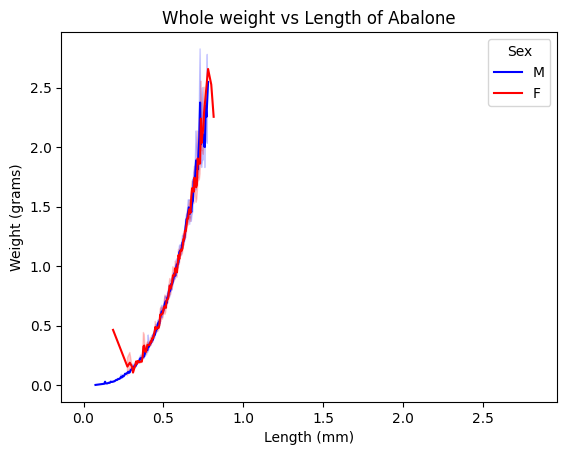

In [71]:
plt.title("Whole weight vs Length of Abalone")
sns.lineplot(data=final_df, x='Length', y='Whole_weight', hue='Sex', palette=['Blue', 'Red'])
plt.xlabel("Length (mm)")
plt.ylabel("Weight (grams)")
plt.xlim(plt.ylim()) # Making Length and Age have same limits for analysis

plt.show()

**CONCLUSION:** There exists some non-linear relationship between weight and size of the snail, such that a small increase in its dimensions leads to a large increase in its weight.

*(This may be because increasing length by $x$ times increases volume by $x^3$ times!)*